In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
df = pd.read_csv('churn_prediction.csv')

##**Missing values**

In [ ]:
df['gender'].fillna('Male',inplace=True)

In [ ]:
df.loc[df['gender'].isnull()==True]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn


In [ ]:
df['dependents'].mean()

0.34723561865812724

In [ ]:
df['dependents'].fillna(0.40388,inplace=True) 

In [ ]:
df['dependents']=df['dependents'].astype('int64')  

In [ ]:
df['dependents'].head(10)

0    0
1    0
2    0
3    0
4    2
5    0
6    0
7    0
8    0
9    3
Name: dependents, dtype: int64

In [ ]:
df['days_since_last_transaction'].mean()

69.99781390357327

In [ ]:
df['days_since_last_transaction'].fillna(69.99,inplace=True) 

In [ ]:
df['days_since_last_transaction']=df['days_since_last_transaction'].astype('int64')  

In [ ]:
df['days_since_last_transaction'].head(10)

0    224
1     60
2     69
3    147
4     58
5     60
6     98
7    172
8     19
9      0
Name: days_since_last_transaction, dtype: int64

In [ ]:
df['city'].mean()

796.1095761267632

In [ ]:
df['city'].fillna(796.10,inplace=True)
df['city']=df['city'].astype('int64')  

In [ ]:
df['city'].head(10)

0     187
1     796
2     146
3    1020
4    1494
5    1096
6    1020
7     623
8    1096
9    1020
Name: city, dtype: int64

In [ ]:
df['occupation'].mode()

0    self_employed
dtype: object

In [ ]:
df['occupation'].fillna('self_employed',inplace=True)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0,self_employed,796,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0,salaried,146,2,41,69,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
df['churn']=df['churn'].astype('int64')  

In [ ]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                          int64
occupation                         object
city                                int64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [ ]:
temp =df[['gender','occupation']]
for i in temp:
  print("***********   Value Count of", i,"\n" )
  print(df[i].value_counts( ))
  print(" ")


***********   Value Count of gender 

Male      17073
Female    11309
Name: gender, dtype: int64
 
***********   Value Count of occupation 

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64
 


In [ ]:
df.pivot_table(values='churn', index='occupation', columns='gender')

gender,Female,Male
occupation,,
company,0.500000,0.029412
retired,0.133676,0.154740
salaried,0.164853,0.173448
self_employed,0.184263,0.210099
student,0.139165,0.174905


In [ ]:
df['churn'].dtype

dtype('int64')

# **univariate**

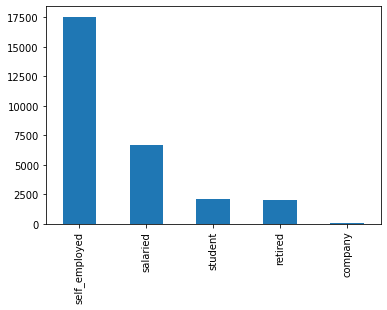

In [ ]:
df['occupation'].value_counts().plot(kind='bar')

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0,self_employed,187,2,755,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0,self_employed,796,2,3214,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0,salaried,146,2,41,69,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,0,self_employed,1020,2,582,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2,self_employed,1494,3,388,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


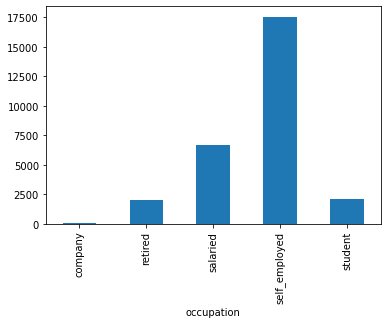

In [ ]:
df['churn'].groupby(df['occupation']).size().plot(kind='bar')

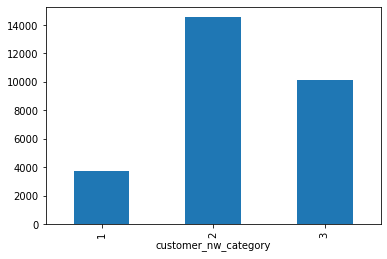

In [ ]:
df['churn'].groupby(df['customer_nw_category']).size().plot(kind='bar')

bivariate

In [ ]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

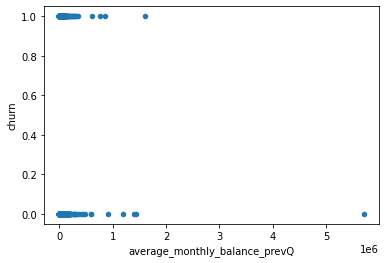

In [ ]:
df.plot.scatter('average_monthly_balance_prevQ','churn')

In [ ]:
df.drop(['customer_id','branch_code'],axis=1,inplace=True)

In [ ]:
df.head()

,vintage,age,gender,dependents,occupation,city,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0,self_employed,187,2,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0,self_employed,796,2,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0,salaried,146,2,69,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,Male,0,self_employed,1020,2,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2,self_employed,1494,3,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
  df=pd.get_dummies(df)
df.head()

,vintage,age,dependents,city,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,3135,66,0,187,2,224,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0
1,310,35,0,796,2,60,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0
2,2356,31,0,146,2,69,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0
3,478,90,0,1020,2,147,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0
4,2531,42,2,1494,3,58,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0


In [ ]:
x = df.drop(['churn'], axis=1)
y = df['churn']
x.shape, y.shape

((28382, 23), (28382,))

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.45,random_state = 101,stratify=y)

In [ ]:
test_x.shape

(12772, 23)

In [ ]:

train_x.shape

(15610, 23)

# **Building a Random Forest Model**

In [ ]:
#Importing random forest classifier 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#creating a random forest instance
clf = RandomForestClassifier(random_state=96,min_samples_split=100)

In [ ]:
#train the model
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=96, verbose=0,
                       warm_start=False)

In [ ]:
#score on training data
clf.score(train_x, train_y)

0.8734144778987828

In [ ]:
#score on test data
clf.score(test_x, test_y)

0.861024115252114

In [ ]:
#looking at the feature importance
clf.feature_importances_

array([0.02796317, 0.01378461, 0.00330751, 0.01422344, 0.00308391,
       0.01983098, 0.31727205, 0.06685257, 0.05020047, 0.0623453 ,
       0.02537003, 0.02558076, 0.12530606, 0.0615089 , 0.13131299,
       0.04549874, 0.00065651, 0.00096211, 0.00044456, 0.00078503,
       0.001339  , 0.00108999, 0.00128131])

In [ ]:
#feature importance against each variable
pd.Series(clf.feature_importances_, index=train_x.columns)

vintage                           0.053863
age                               0.041122
dependents                        0.009809
city                              0.040742
customer_nw_category              0.012968
days_since_last_transaction       0.041762
current_balance                   0.176706
previous_month_end_balance        0.066393
average_monthly_balance_prevQ     0.063259
average_monthly_balance_prevQ2    0.066816
current_month_credit              0.047710
previous_month_credit             0.046988
current_month_debit               0.082901
previous_month_debit              0.064158
current_month_balance             0.094882
previous_month_balance            0.060539
gender_Female                     0.006505
gender_Male                       0.006049
occupation_company                0.000243
occupation_retired                0.002408
occupation_salaried               0.005569
occupation_self_employed          0.005843
occupation_student                0.002765
dtype: floa